In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [29]:
supermarket_sales = pd.read_csv('supermarket_sales - Sheet1.csv')
supermarket_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [50]:
#finding missing value
finding_missing = supermarket_sales.isnull().sum()
finding_missing

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [21]:
#removing irrelevant data
supermarket_sales = supermarket_sales.drop(columns=['Invoice ID'])
supermarket_sales

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [22]:
#handling categorical variables using one-hot encoding
supermarket_sales = pd.get_dummies(supermarket_sales, drop_first=True)
supermarket_sales

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Branch_B,Branch_C,...,Time_20:48,Time_20:50,Time_20:51,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,False,False,...,False,False,False,False,False,False,False,False,False,True
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,False,True,...,False,False,False,False,False,False,False,False,False,False
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,False,False,...,False,False,False,False,False,False,False,False,True,False
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,False,False,...,False,False,False,False,False,False,False,False,False,True
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2,False,True,...,False,False,False,False,False,False,False,False,False,True
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4,True,False,...,False,False,False,False,False,False,False,False,False,True
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7,False,False,...,False,False,False,False,False,False,False,False,False,False
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
#Separating features and target variables
y = supermarket_sales['gross income']
x = supermarket_sales.drop(columns=['gross income'])
print(y)
print(x)

0      26.1415
1       3.8200
2      16.2155
3      23.2880
4      30.2085
        ...   
995     2.0175
996    48.6900
997     1.5920
998     3.2910
999    30.9190
Name: gross income, Length: 1000, dtype: float64
     Unit price  Quantity   Tax 5%      Total    cogs  \
0         74.69         7  26.1415   548.9715  522.83   
1         15.28         5   3.8200    80.2200   76.40   
2         46.33         7  16.2155   340.5255  324.31   
3         58.22         8  23.2880   489.0480  465.76   
4         86.31         7  30.2085   634.3785  604.17   
..          ...       ...      ...        ...     ...   
995       40.35         1   2.0175    42.3675   40.35   
996       97.38        10  48.6900  1022.4900  973.80   
997       31.84         1   1.5920    33.4320   31.84   
998       65.82         1   3.2910    69.1110   65.82   
999       88.34         7  30.9190   649.2990  618.38   

     gross margin percentage  Rating  Branch_B  Branch_C  City_Naypyitaw  ...  \
0                   

In [25]:
#feature scaling (Standardization (z-score normalization))
x = StandardScaler().fit_transform(x)
x

array([[ 0.71816014,  0.5099302 ,  0.91960685, ..., -0.04476615,
        -0.67184731,  1.37787907],
       [-1.52530319, -0.17453987, -0.98772956, ..., -0.04476615,
        -0.67184731, -0.7257531 ],
       [-0.35278112,  0.5099302 ,  0.07144605, ..., -0.04476615,
         1.48843343, -0.7257531 ],
       ...,
       [-0.89995809, -1.54348001, -1.17810859, ..., -0.04476615,
        -0.67184731, -0.7257531 ],
       [ 0.38320778, -1.54348001, -1.03293176, ..., -0.04476615,
        -0.67184731, -0.7257531 ],
       [ 1.23361671,  0.5099302 ,  1.32783657, ..., -0.04476615,
        -0.67184731, -0.7257531 ]])

<h1>Splitting Data</h1>

In [64]:
#splitting into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)
#for validation
x_validation, x_test, y_validation, y_test= train_test_split(x_test, y_test, test_size=0.5, random_state=27)

<h1>Build and Train the Model</h1>

In [65]:
model = LinearRegression()

In [66]:
model.fit(x_train, y_train)

LinearRegression()

In [38]:
#coefficients
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficients:  [ 7.69491838e-15 -3.55271368e-15  4.67956576e+00  3.37679478e+00
  3.64660907e+00  5.65769239e-01 -9.99200722e-16 -1.33934031e-01
  2.37683700e-01 -3.71206437e-01 -1.34724039e-01  1.27675648e-15
 -2.22044605e-16  9.99200722e-16 -2.74780199e-15  1.11022302e-16
  2.56739074e-16 -1.44328993e-15  2.10942375e-15  1.81799020e-15
  1.49880108e-15 -1.44328993e-15 -1.84574578e-15  1.54043445e-15
 -3.33066907e-16  1.77288739e-15 -4.99600361e-16 -3.13638004e-15
  1.95676808e-15 -1.83186799e-15 -2.33146835e-15 -3.19189120e-16
 -1.06858966e-15 -1.36002321e-15  1.30451205e-15 -4.44089210e-16
 -2.11376056e-15 -1.32446137e-15 -2.19269047e-15 -7.77156117e-16
 -1.38777878e-15  5.55111512e-17  8.18789481e-16 -1.55778168e-15
 -1.90125693e-15 -8.25348904e-16 -5.55111512e-16  8.60422844e-16
  8.22258928e-16 -1.31838984e-15  1.33226763e-15  1.11022302e-16
  1.38777878e-16  1.63757896e-15 -1.57512892e-15  9.43689571e-16
  2.38697950e-15 -1.25940924e-15  1.08246745e-15  1.08246745e-15
  9.020562

In [69]:
y_prediction = model.predict(x_validation)
residuals = y_validation - y_prediction
print(y_prediction)
print(residuals)

[ 22.37        35.372        0.814        9.0045       2.5735
  17.625        4.395       24.81        45.19107615  -2.67138952
  11.078       -5.25387979  24.332        0.9575      12.57
  37.22         8.5905      34.44        10.4685492   31.06
  26.244        5.803      -10.55675054   7.48263586  15.536
   2.279       -1.89695323  -4.94943212   9.848       39.695
  -6.83907812   2.568        2.18804176  11.232        4.75
   3.333       19.128        9.979       -3.53701722  27.951
   5.745       11.63        25.77360053  10.64456285   0.985
  14.265       29.008       21.968        6.9975      30.368
  25.368        2.348       20.05729893  -9.23963185  23.63163586
   3.735        6.377        8.2005      -9.12912092   6.618
  25.571       35.1315      31.5855       7.278        3.4475
   4.565        2.7475      35.3475      48.34264133   0.627
  22.491        4.992        6.9325      15.291        9.0045
   4.4225       9.937       48.69         5.79        21.4935
   4.876     

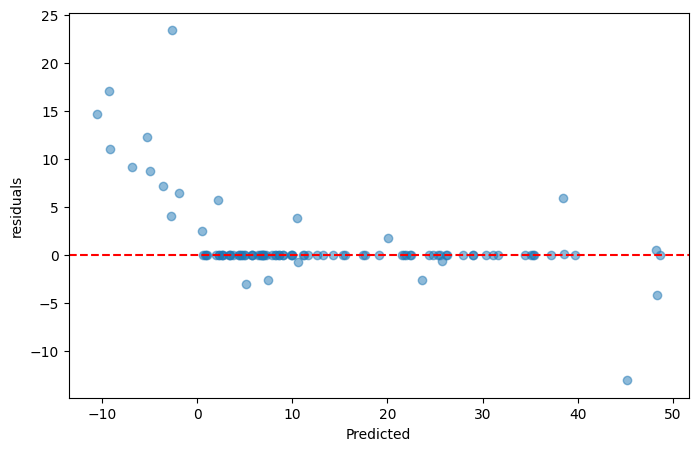

In [72]:
plt.figure(figsize=(8, 5))
plt.scatter(y_prediction, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('residuals')
plt.show()

<h1>Evaluate the Model</h1>

In [63]:
mae = mean_absolute_error(y_test, y_validation)
r2 = r2_score(y_test, y_prediction)
print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)

ValueError: Found input variables with inconsistent numbers of samples: [75, 175]

<Axes: >

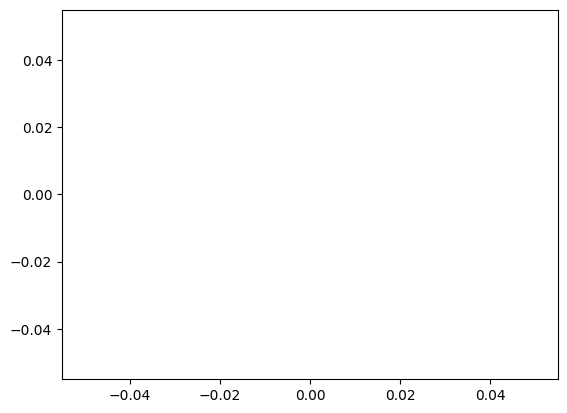

In [62]:
sns.scatterplot(x=y_test, y=y_validation)